# Named Entity Recognition

Named Entity Recognition (NER) is the process of locating named entities in unstructured text and then classifying them into pre-defined categories, such as person names, organizations, locations, monetary values, percentages, time expressions, and so on.

## Libraries

In [1]:
import time
import spacy
from spacy import displacy
import matplotlib.pyplot as plt

## Load the model

In [2]:
# !python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_lg
# !python -m spacy download en_core_web_trf

In [3]:
text = "When a letter arrives for unhappy but  ordinary Harry Potter, a decade-old secret  is revealed to him. His parents were  wizards, killed by a Dark Lord’s curse  when Harry was just a baby, and which he  somehow survived. Escaping from his  unbearable Muggle guardians to Hogwarts,  a wizarding school brimming with ghosts  and enchantments, Harry stumbles into a  sinister adventure when he finds a three- headed dog guarding a room on the third  floor. Then he hears of a missing stone  with astonishing powers which could be  valuable, dangerous, or both. "

In [4]:
nlp_sm = spacy.load("en_core_web_sm")

In [5]:
doc = nlp_sm(text)

In [6]:
displacy.render(doc, style="ent")

In [7]:
nlp_lg = spacy.load("en_core_web_lg")

In [8]:
doc = nlp_lg(text)

In [9]:
displacy.render(doc, style="ent")

In [10]:
nlp_trf = spacy.load("en_core_web_trf")

In [11]:
doc = nlp_trf(text)

In [12]:
displacy.render(doc, style="ent")

## Execution time

In [13]:
def exc_timeit(nlp: spacy.Language, txt: str):
    t = []
    for _ in range(1_000):
        t_start = time.time()
        _ = nlp(txt)
        t_end = time.time()
        t.append(t_end - t_start)
    return t

In [14]:
t_sm = exc_timeit(nlp_sm, text)
t_lg = exc_timeit(nlp_lg, text)
t_trf = exc_timeit(nlp_trf, text)

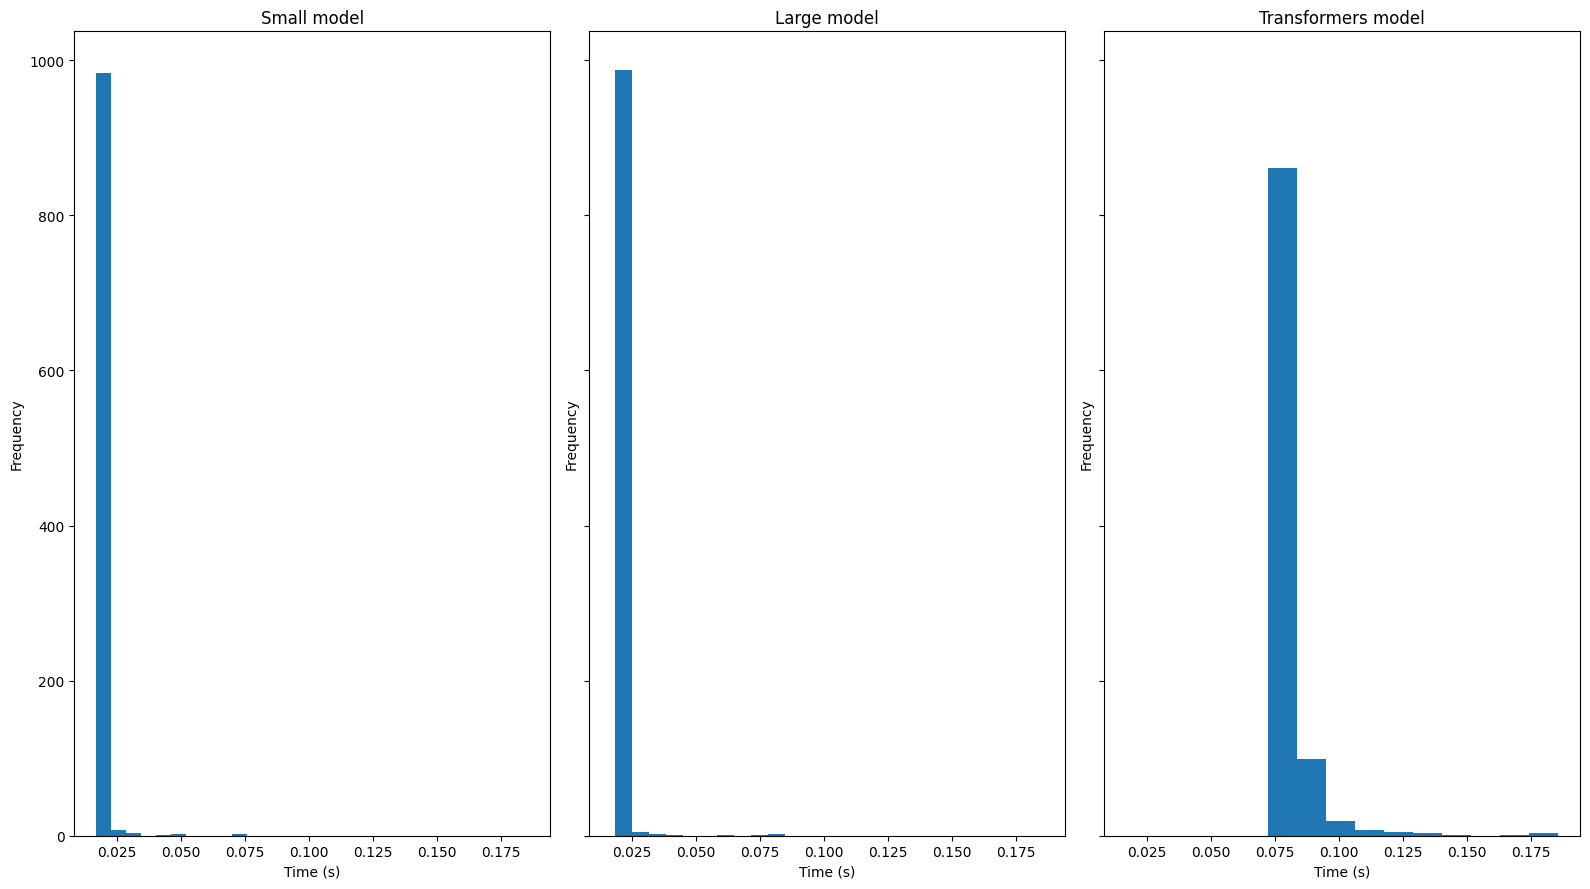

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(16, 9), sharey=True, sharex=True)

axes[0].hist(t_sm, bins=10)
axes[0].set_title("Small model")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Frequency")

axes[1].hist(t_lg, bins=10)
axes[1].set_title("Large model")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Frequency")

axes[2].hist(t_trf, bins=10)
axes[2].set_title("Transformers model")
axes[2].set_xlabel("Time (s)")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

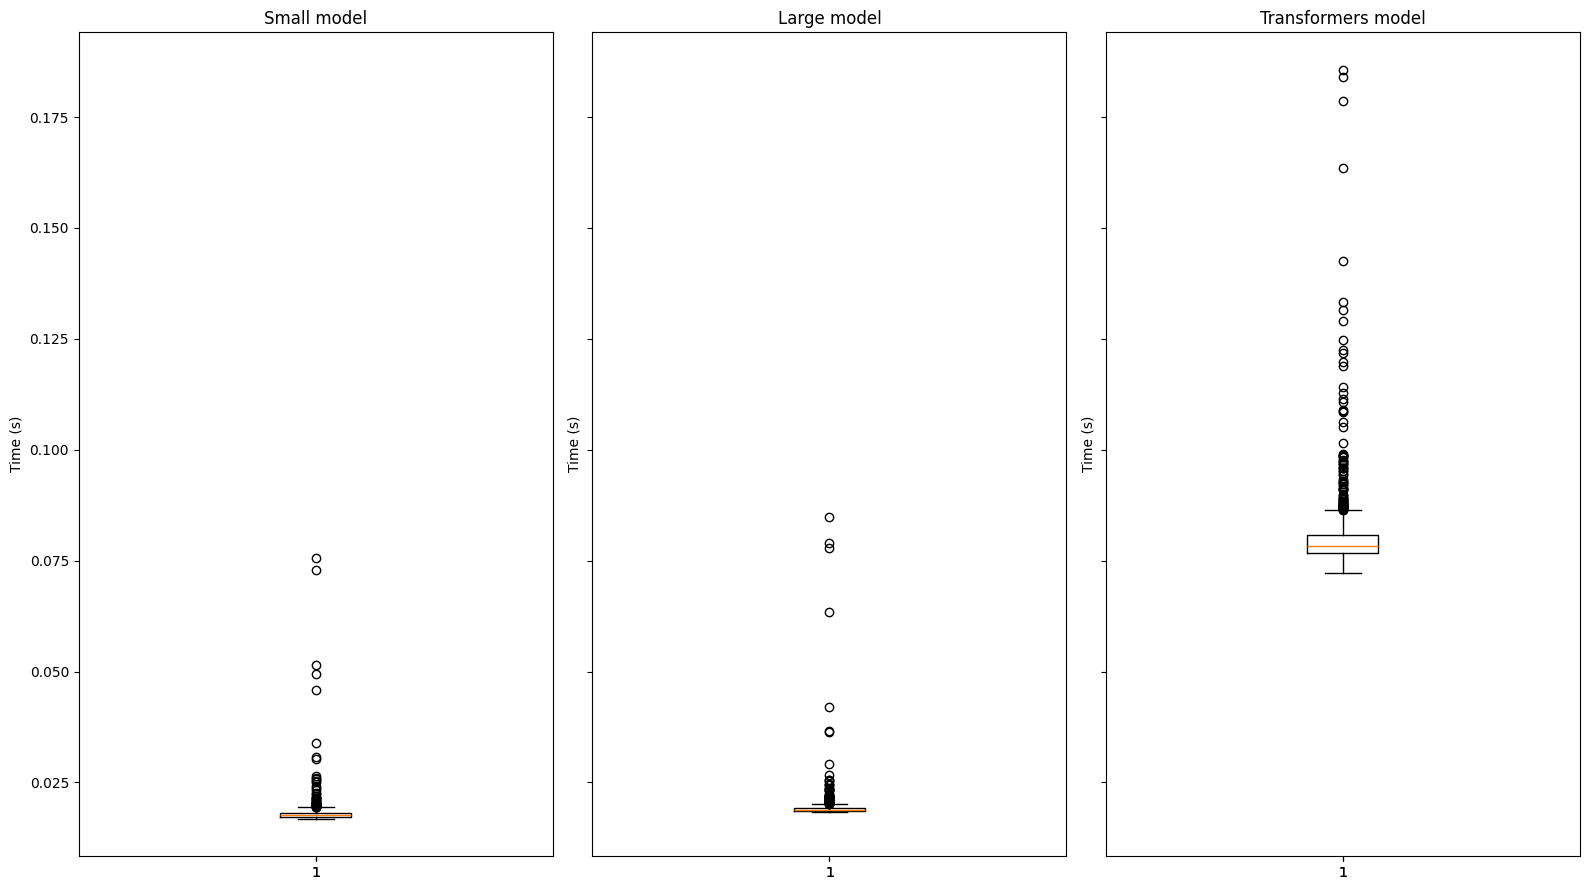

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(16, 9), sharey=True, sharex=True)

axes[0].boxplot(t_sm)
axes[0].set_title("Small model")
axes[0].set_ylabel("Time (s)")

axes[1].boxplot(t_lg)
axes[1].set_title("Large model")
axes[1].set_ylabel("Time (s)")

axes[2].boxplot(t_trf)
axes[2].set_title("Transformers model")
axes[2].set_ylabel("Time (s)")

plt.tight_layout()
plt.show()

## Conclusion
The small model is the fastest, but it is the least accurate. The transformers model is the slowest, but it is the most accurate. The larage model is the most balanced, but it is not the fastest nor the most accurate. The transformers model is the choice for most applications, in this case it is only performing better in one word: `Hogwarts`.